In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [21]:
# Read the CSV file
data = pd.read_csv('data/toy/csv/dependencies.csv')

In [22]:
data

,destination,argument_1,argument_2,operator
0,profit,investment in apples,% ROI apples,*
1,profit,investment in machinery,% ROI machinery,*
2,number of machines,investment in machinery,cost of machines,/
3,efficiency,number of machines,efficiency per machine,*


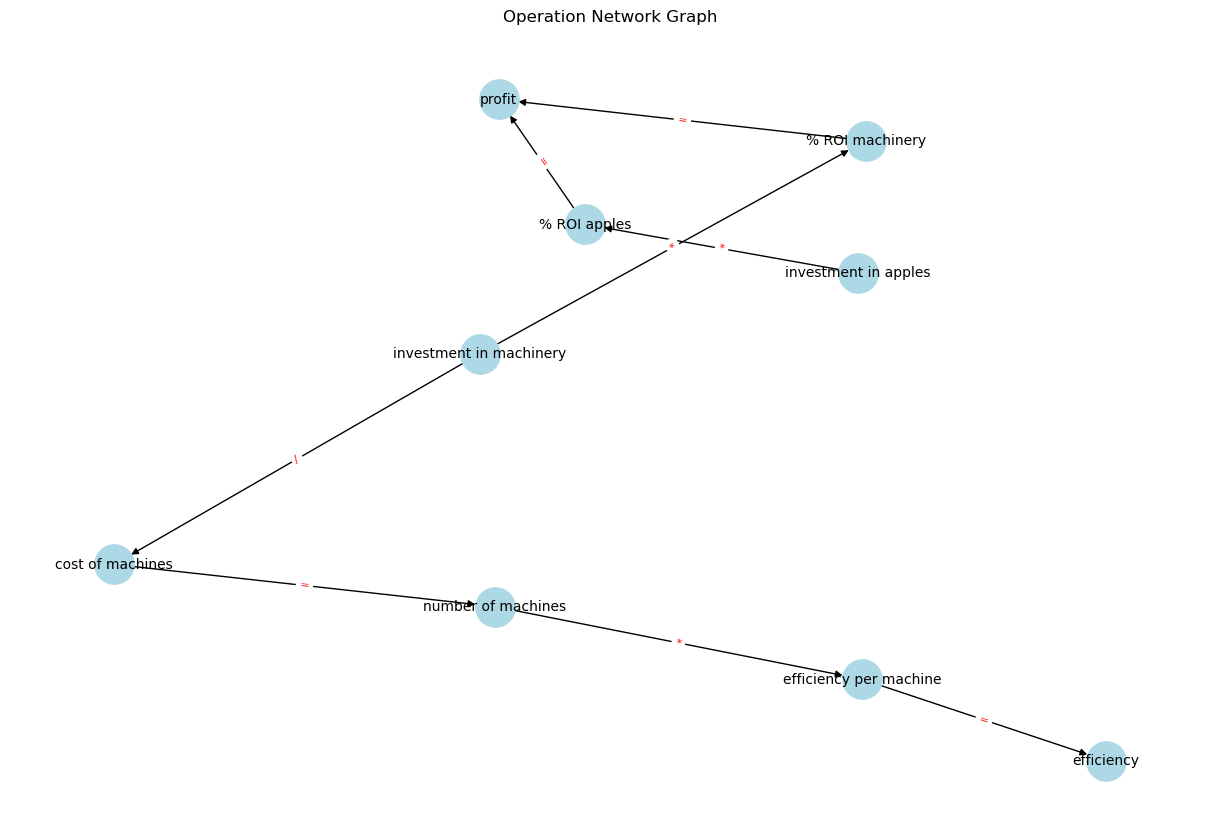

In [23]:
# Initialize a directed graph
G = nx.DiGraph()

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination)
    G.add_node(argument_1)
    G.add_node(argument_2)
    
    # Add an edge from argument_1 to destination with the operator as the label
    if pd.isna(argument_1):
        G.add_edge(argument_2, destination, operator='squeezed')
    elif pd.isna(argument_2):
        G.add_edge(argument_1, destination, operator='squeezed')
    else:
        G.add_edge(argument_1, argument_2, operator=operator)
        # Later make function so that based on category, we make the edge to destination
        G.add_edge(argument_2, destination, operator='=')

# Define the layout for the graph (you can use different layouts)
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_color='black')
edge_labels = nx.get_edge_attributes(G, 'operator')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')
plt.title('Operation Network Graph')
plt.show()


NameError: name 'NaN' is not defined